In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr 
!pip install netcdf4

import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
path = '/Users/egust/python/Float/data/'
files=glob.glob(path+'*.nc')
files[0]

'/Users/egust/python/Float/data\\5904184_HRQC.nc'

In [5]:
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 555, N_PROF: 153)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 06/23/2...

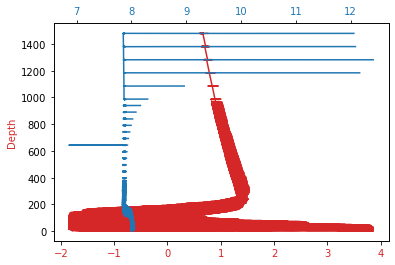

In [6]:
# A graph with 2 x-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twiny() # Create a second axes that shares the same y-axis

color = 'tab:red'
ax1.plot(ds.Temperature, ds.Depth, color=color)
ax1.set_ylabel('Depth', color=color)
ax1.tick_params(axis='x', labelcolor=color)

color = 'tab:blue'
ax2.plot(ds.pHinsitu, ds.Depth, color=color)
ax2.set_ylabel('pHinsitu', color=color)  
ax2.tick_params(axis='x', labelcolor=color) #How to get one measure of depth throughout the graph? -reverse

In [7]:
# How many floats are there
print('There are '+ str(len(files)) +' floats')

There are 128 floats


In [8]:
len(ds.pHinsitu)

153

In [9]:
# How many active floats are there
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]

In [10]:
ds.Lat

<xarray.DataArray 'Lat' (N_PROF: 153)>
array([-63.973, -63.803, -63.676, -63.54 , -63.48 , -63.477, -63.551, -63.523,
       -63.495, -63.467, -63.439, -63.411, -63.383, -63.356, -63.328, -63.3  ,
       -63.272, -63.244, -63.216, -63.188, -63.16 , -63.132, -63.105, -63.077,
       -63.049, -63.021, -62.993, -62.979, -62.978, -62.946, -62.953, -62.939,
       -62.971, -62.938, -62.919, -62.893, -62.848, -62.789, -62.678, -62.561,
       -62.443, -62.32 , -62.2  , -62.106, -62.019, -61.933, -61.821, -61.709,
       -61.598, -61.487, -61.376, -61.303, -61.231, -61.159, -61.178, -61.254,
       -61.264, -61.24 , -61.142, -61.038, -60.949, -60.804, -60.745, -60.737,
       -60.733, -60.747, -60.738, -60.691, -60.592, -60.498, -60.426, -60.382,
       -60.363, -60.327, -60.292, -60.264, -60.231, -60.213, -60.214, -60.176,
       -60.148, -60.142, -60.111, -60.057, -59.942, -59.884, -59.836, -59.788,
       -59.74 , -59.733, -59.726, -59.719, -59.712, -59.636, -59.592, -59.548,
       -59.483, -59.412, -59.335, -59.282, -59.382, -59.571, -59.75 , -60.003,
       -60.128, -60.22 , -60.253, -60.3  , -60.376, -60.605, -60.806, -61.001,
       -61.09 , -61.228, -61.461, -61.634, -61.627, -61.79 , -61.958, -62.047,
       -61.95 , -61.897, -61.707, -61.52 , -61.333, -61.266, -61.169, -61.15 ,
       -61.186, -61.039, -60.929, -60.896, -60.933, -61.018, -61.178, -61.295,
       -61.365, -61.405, -61.574, -61.722, -61.885, -62.016, -62.086, -62.119,
       -62.222, -62.453, -62.683, -62.931, -63.224, -63.434, -63.575, -63.627,
       -63.635])
Dimensions without coordinates: N_PROF

In [11]:
ds.Lon.mean()

<xarray.DataArray 'Lon' ()>
array(213.4727451)

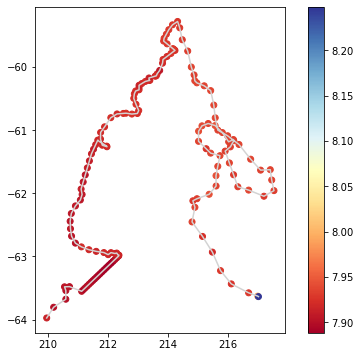

In [12]:
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

In [13]:
# want to find all of the floats with in the location of bin 1
bin1= []
bin2= []
bin3= []
bin4= []
bin5= []
bin6= []
bin7= []
bin8= []
bin9= []
bin10= []
bin11= []
bin12= []

for i in range(len(files)):
    ds = xr.open_dataset(files[i])
    
    if ds.Lon.mean() >= 0 and ds.Lon.mean() < 30:
        bin1.append(files[i])
    elif ds.Lon.mean() >= 30 and ds.Lon.mean() < 60:
        bin2.append(files[i])
    elif ds.Lon.mean() >= 60 and ds.Lon.mean() < 90:
        bin3.append(files[i])
    elif ds.Lon.mean() >= 90 and ds.Lon.mean() < 120:
        bin4.append(files[i])
    elif ds.Lon.mean() >= 120 and ds.Lon.mean() < 150:
        bin5.append(files[i])
    elif ds.Lon.mean() >= 150 and ds.Lon.mean() < 180:
        bin6.append(files[i])
    elif ds.Lon.mean() >= 180 and ds.Lon.mean() < 210:
        bin7.append(files[i])
    elif ds.Lon.mean() >= 210 and ds.Lon.mean() < 240:
        bin8.append(files[i])
    elif ds.Lon.mean() >= 240 and ds.Lon.mean() < 270:
        bin9.append(files[i])
    elif ds.Lon.mean() >= 270 and ds.Lon.mean() < 300:
        bin10.append(files[i])
    elif ds.Lon.mean() >= 300 and ds.Lon.mean() < 330:
        bin11.append(files[i])
    elif ds.Lon.mean() >= 330 and ds.Lon.mean() <= 360:
        bin12.append(files[i])

    

In [14]:
bin2

['/Users/egust/python/Float/data\\5904473_HRQC.nc',
 '/Users/egust/python/Float/data\\5905369_HRQC.nc',
 '/Users/egust/python/Float/data\\5906007_HRQC.nc',
 '/Users/egust/python/Float/data\\5906030_HRQC.nc',
 '/Users/egust/python/Float/data\\5906031_HRQC.nc',
 '/Users/egust/python/Float/data\\5906032_HRQC.nc',
 '/Users/egust/python/Float/data\\5906210_HRQC.nc',
 '/Users/egust/python/Float/data\\5906211_HRQC.nc']

In [29]:
def pHmonitor(ds):
    """ Allows you to check if the float is faulty """
    pHmonitor = []
    for i in range(len(ds.pHinsitu)):
        if ds.pHinsitu[i].mean() >= 0 and ds.pHinsitu[i].mean() <= 14:
            pHmonitor.append('True')
        else:
            pHmonitor.append('False')
    if 'False' in pHmonitor:
        Faulty = 'Faulty'
    elif 'False' not in pHmonitor:
        Faulty = 'Not Faulty'
    return Faulty

In [35]:
def Find_Faulty(bin_):
    for i in range(len(bin_)):
        ds = xr.open_dataset(bin_[i])
        if pHmonitor(ds) == 'Faulty':
            print(i)

In [40]:
print(Find_Faulty(bin1))

0
1
4
None


In [37]:
print(Find_Faulty(bin2))

0
None


In [38]:
print(Find_Faulty(bin3))

0
1
3
10
None


In [42]:
ds = xr.open_dataset(bin3[10])
ds.pHinsitu

<xarray.DataArray 'pHinsitu' (N_PROF: 52, N_LEVELS: 560)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    units:    Total

In [39]:
print(Find_Faulty(bin4))

2
3
9
None


In [41]:
print(Find_Faulty(bin5))

0
1
4
None


In [58]:
print(Find_Faulty(bin6))
print(Find_Faulty(bin7))
print(Find_Faulty(bin8))
print(Find_Faulty(bin9))
print(Find_Faulty(bin10))
print(Find_Faulty(bin11))
print(Find_Faulty(bin12))

0
1
2
3
4
6
7
8
9
10
11
12
13
None
1
2
4
5
8
9
10
12
13
None
1
4
5
6
8
15
None
1
2
3
4
6
None
0
1
2
3
4
5
6
7
8
None
1
10
None
1
4
None


In [59]:
len(bin6)

14

In [15]:
ds = xr.open_dataset(bin2[0])
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 555, N_PROF: 67)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 06/23/2...

In [16]:
ds.Lon

<xarray.DataArray 'Lon' (N_PROF: 67)>
array([12.964, 13.761, 15.084, 16.538, 17.425, 17.295, 17.58 , 18.861, 20.257,
       21.303, 21.409, 21.024, 22.068, 23.652, 27.105, 27.701, 30.849, 34.54 ,
       37.315, 38.953, 39.663, 40.613, 41.452, 42.396, 43.586, 45.078, 46.959,
       48.296, 48.747, 48.74 , 48.64 , 48.794, 48.766, 48.194, 47.879, 47.751,
       47.16 , 45.907, 45.008, 46.015, 47.665, 48.947, 50.535, 51.674, 52.17 ,
       51.965, 51.885, 52.886, 54.176, 55.176, 57.036, 56.074, 55.419, 55.627,
       56.765, 59.582, 58.272, 57.029, 56.04 , 57.166, 56.881, 57.737, 58.838,
       61.755, 65.357, 69.29 ,    nan])
Dimensions without coordinates: N_PROF

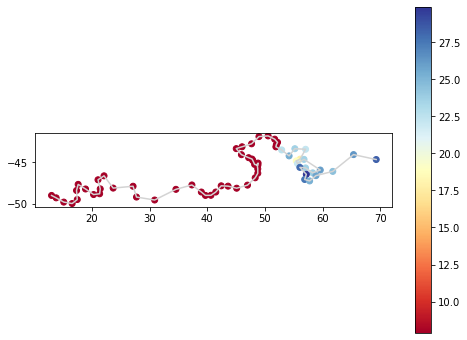

In [17]:
ds = xr.open_dataset(bin2[0])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

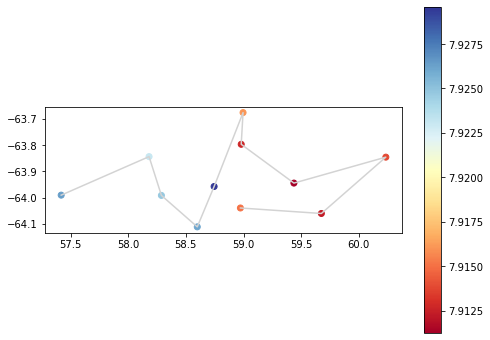

In [68]:
ds = xr.open_dataset(bin2[1])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

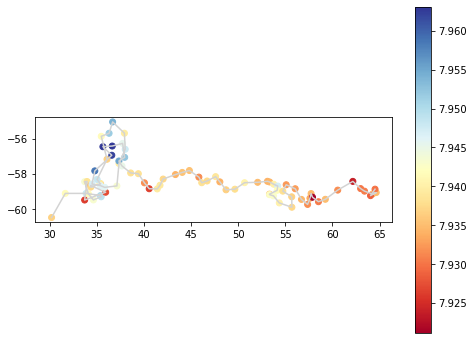

In [70]:
ds = xr.open_dataset(bin2[2])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

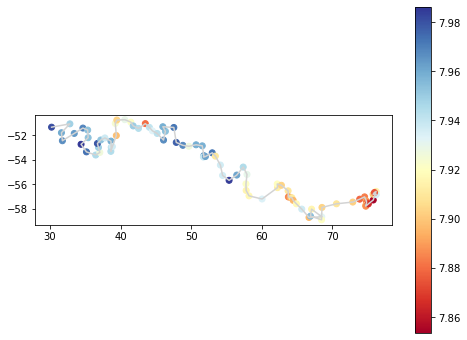

In [71]:
ds = xr.open_dataset(bin2[3])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

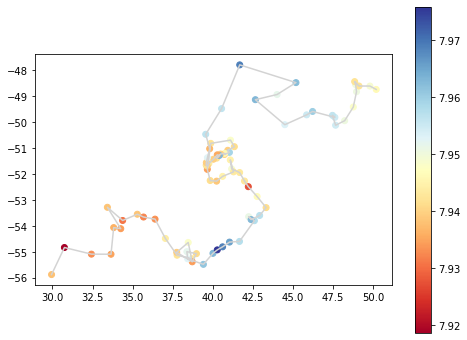

In [72]:
ds = xr.open_dataset(bin2[4])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

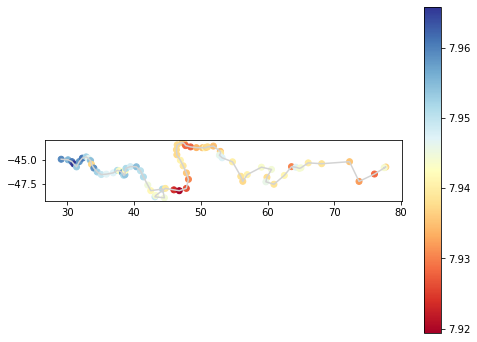

In [73]:
ds = xr.open_dataset(bin2[5])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

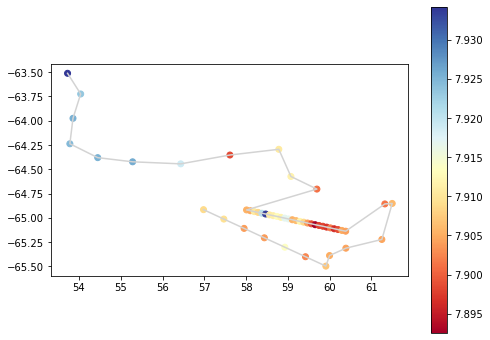

In [74]:
ds = xr.open_dataset(bin2[6])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

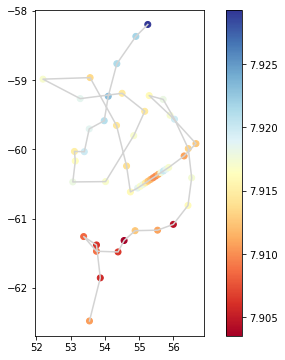

In [75]:
ds = xr.open_dataset(bin2[7])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

In [ ]:
# Get rid of all deactivated floats 
bin2_active = []

for i in range(len(bin2)):
    ds = xr.open_dataset(bin2[i])
    
    if ds.pHinsitu.mean() >= 0 and ds.pHinsitu.mean() < 30:
        bin2_active.append([i])

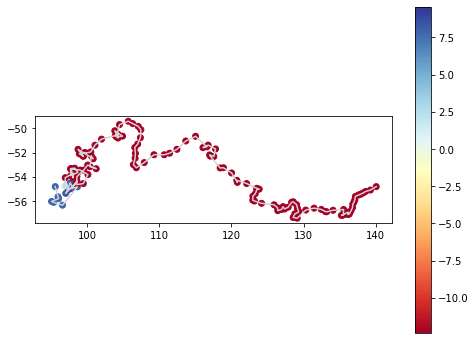

In [56]:
ds = xr.open_dataset(bin4[3])
mean_pH = [ds.pHinsitu[i].mean() for i in range(0,len(ds.pHinsitu))]
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(ds.Lon, ds.Lat, c='lightgrey')
plt.scatter(ds.Lon, ds.Lat, c=mean_pH, cmap='RdYlBu')

# Crude profile labels
#for jj in [1,25,-1]:
  #plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

In [57]:
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 559, N_PROF: 137)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 95.59 95.98 96.06 ... 139.2 140.1
    Lat                  (N_PROF) float64 -54.81 -55.65 -55.81 ... -55.1 -54.82
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 06/23/2...